In [165]:
import pandas as pd
import matplotlib.pyplot as plt

# Cargar el dataset
file_path = 'qualifying_1960-2024.csv'
df = pd.read_csv(file_path)

# Especificar las columnas que quieres seleccionar
columnas_deseadas = ['home_team', 'away_team', 'home_team_code', 'away_team_code', 'home_score', 'away_score', 'winner', 'winner_reason', 'year', 'status', 'round']  

# Crear un nuevo DataFrame con estas columnas
df1 = df[columnas_deseadas]

#reemplazar nombres
df1 = df1.replace({"German Dem. Rep.": "Germany", "GDR": "GER", "USSR": "Russia","URS": "RUS","FINAL_TOURNAMENT_PLAY_OFF": "FINAL","Northern Ireland":"Ireland", "Republic of Ireland":"Ireland","NIR":"IRL"})

# Añadir una nueva columna 'score_dif' que calcule la resta entre 'home_score' y 'away_score'
df1['score_dif'] = df1['home_score'] - df1['away_score']

# Añadir una nueva columna booleana 'home_winner' donde es True si 'score_dif' es positivo, de lo contrario False
df1['home_winner'] = df1['score_dif'] > 0 #damos empate como pérdida

# Eliminar las filas donde la columna 'status' es "cancelled"
df1 = df1[df1['status'] == 'FINISHED']

# Guardar el nuevo DataFrame
nuevo_file_path = 'qualifying_1960-2024_seleccionado.csv'
df1.to_csv(nuevo_file_path, index=False)

print(f"El nuevo archivo con las columnas seleccionadas se ha guardado en: {nuevo_file_path}")

El nuevo archivo con las columnas seleccionadas se ha guardado en: qualifying_1960-2024_seleccionado.csv


In [167]:
df1.shape

(2831, 13)

In [169]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2831 entries, 0 to 2844
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   home_team       2831 non-null   object 
 1   away_team       2831 non-null   object 
 2   home_team_code  2831 non-null   object 
 3   away_team_code  2831 non-null   object 
 4   home_score      2831 non-null   float64
 5   away_score      2831 non-null   float64
 6   winner          2282 non-null   object 
 7   winner_reason   2831 non-null   object 
 8   year            2831 non-null   int64  
 9   status          2831 non-null   object 
 10  round           2831 non-null   object 
 11  score_dif       2831 non-null   float64
 12  home_winner     2831 non-null   bool   
dtypes: bool(1), float64(3), int64(1), object(8)
memory usage: 290.3+ KB


In [171]:
#Number of matches by year
df1.groupby('year')['year'].count()
#Number of matches by round
df1['round'].value_counts()

round
PRELIMINARY       1422
QUALIFYING        1281
FINAL               56
QUARTER_FINALS      40
ROUND_OF_16         32
Name: count, dtype: int64

In [173]:
home_goal = df1.groupby(['home_team'])['home_score'].sum()
away_goal = df1.groupby(['away_team'])['away_score'].sum()
total_goals = pd.concat([home_goal, away_goal], axis=1)
total_goals['home_score'] = total_goals['home_score'].fillna(0)
total_goals['away_score'] = total_goals['away_score'].fillna(0)
total_goals['total'] = total_goals['home_score'] + total_goals['away_score']
total_goals.sort_values('total', ascending=False)

,home_score,away_score,total
Spain,211.0,128.0,339.0
Ireland,203.0,136.0,339.0
Netherlands,167.0,124.0,291.0
England,157.0,123.0,280.0
Germany,154.0,118.0,272.0
Russia,161.0,104.0,265.0
France,162.0,98.0,260.0
Portugal,150.0,102.0,252.0
Romania,149.0,93.0,242.0
Italy,149.0,88.0,237.0


In [175]:
#Number of goal conceded by Country

home_conceded = df1.groupby(['home_team'])['away_score'].sum()
away_conceded = df1.groupby(['away_team'])['home_score'].sum()
total_conceded = pd.concat([home_conceded, away_conceded], axis=1)
total_conceded['home_score'] = total_conceded['home_score'].fillna(0)
total_conceded['away_score'] = total_conceded['away_score'].fillna(0)
total_conceded['total'] = total_conceded['home_score'] + total_conceded['away_score']
total_conceded.sort_values('total', ascending=False)

,away_score,home_score,total
San Marino,147.0,224.0,371.0
Luxembourg,151.0,189.0,340.0
Malta,133.0,202.0,335.0
Ireland,125.0,191.0,316.0
Cyprus,119.0,197.0,316.0
Liechtenstein,98.0,137.0,235.0
Faroe Islands,102.0,123.0,225.0
Andorra,82.0,107.0,189.0
Finland,78.0,108.0,186.0
Norway,75.0,107.0,182.0


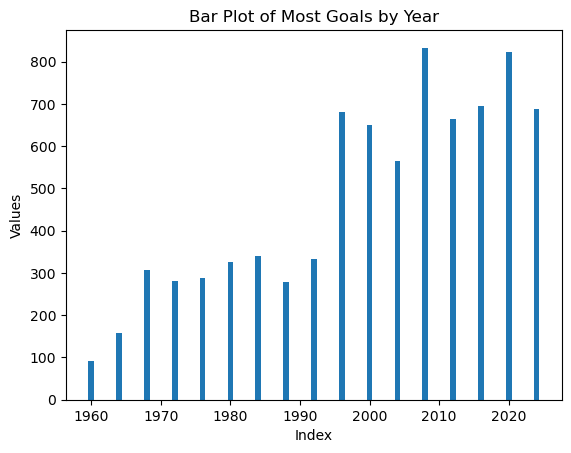

In [177]:
home_year = df1.groupby(['year'])['home_score'].sum()
away_year = df1.groupby(['year'])['away_score'].sum()
total_year = pd.concat([home_year, away_year], axis=1)
total_year['total'] = total_year['home_score'] + total_year['away_score']
total_year.sort_values('total', ascending=False)
year = total_year['total']

plt.bar(year.index, year.values)
plt.xlabel('Index')
plt.ylabel('Values')
plt.title('Bar Plot of Most Goals by Year')
plt.show()

In [179]:
#Number total of final by Country
number_final_home = df1.loc[df1['round'] == 'FINAL'].groupby('home_team')['home_team'].count()
number_final_away =df1.loc[df1['round'] == 'FINAL'].groupby('away_team')['away_team'].count()
total_final = pd.concat([number_final_home, number_final_away], axis=1)

total_final['home_team'] = total_final['home_team'].fillna(0)
total_final['away_team'] = total_final['away_team'].fillna(0)
total_final['total'] = total_final['home_team'] + total_final['away_team']
total_final.sort_values('total', ascending=False)

,home_team,away_team,total
Ireland,5.0,5.0,10.0
Bosnia and Herzegovina,4.0,2.0,6.0
Slovenia,3.0,3.0,6.0
Ukraine,3.0,3.0,6.0
Scotland,3.0,3.0,6.0
Türki̇ye,3.0,3.0,6.0
Norway,3.0,2.0,5.0
Hungary,2.0,2.0,4.0
Israel,2.0,2.0,4.0
Iceland,1.0,3.0,4.0
